In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from utils.cifar_utils import load_data
from matplotlib import pyplot as plt
from utils.layer_funcs import *

## 1. Load Data

In [30]:
# Load the raw CIFAR-10 data.
X_train, y_train = load_data(mode='train')
X_test, y_test = load_data(mode='test')

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 45000
num_validation = 5000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image

X_train = X_train.reshape([X_train.shape[0],3,32,32]).transpose((0,2,3,1))/255
X_val = X_val.reshape([X_val.shape[0],3,32,32]).transpose((0,2,3,1))/255
X_test = X_test.reshape([X_test.shape[0],3,32,32]).transpose((0,2,3,1))/255

# X_train = X_train.reshape([-1,3,32,32])/255
# X_val = X_val.reshape([-1,3,32,32])/255
# X_test = X_test.reshape([-1,3,32,32])/255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape', X_test.shape)
print('Test labels shape', y_test.shape)


./data/cifar-10-python.tar.gz already exists. Begin extracting...
./data/cifar-10-python.tar.gz already exists. Begin extracting...
Train data shape:  (45000, 32, 32, 3)
Train labels shape:  (45000,)
Validation data shape:  (5000, 32, 32, 3)
Validation labels shape:  (5000,)
Test data shape (10000, 32, 32, 3)
Test labels shape (10000,)


## 2. Data Augmentation

(32, 32, 3)

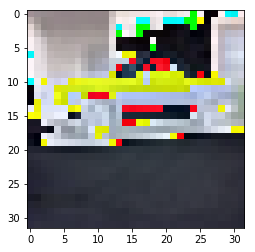

In [31]:
plt.imshow(X_train[0])
X_train[0].shape

In [33]:
a = tf.image.flip_left_right(X_train[0])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    

<tf.Tensor 'ReverseV2_1:0' shape=(32, 32, 3) dtype=float32>